<a href="https://colab.research.google.com/github/subham129/Machine-Learning-/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [20]:
df.shape

(42000, 785)

In [21]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26671,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
import matplotlib.pyplot as plt

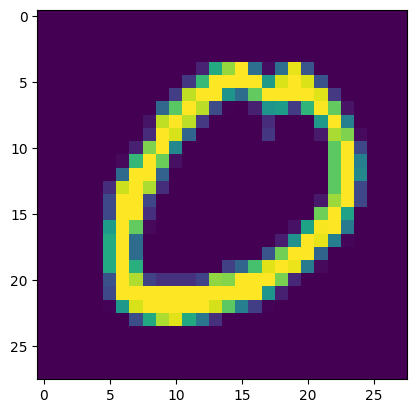

In [23]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [24]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape

(33600, 784)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

31.186396837234497


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [35]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [36]:
X_train_trf.shape

(33600, 200)

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [39]:
y_pred = knn.predict(X_test_trf)

In [40]:
accuracy_score(y_test,y_pred)

0.9502380952380952

In [ ]:
max_accuracy = 0
best_n_components = 0
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    accuracy =  accuracy_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_n_components = i
print(f'n_components = {i} , accuracy = {accuracy}')


In [ ]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

In [42]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [ ]:
pca.explained_variance_
# Eigen values

In [ ]:
pca.components_.shape
# Eigen vectors

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
pca.explained_variance_.shape

In [ ]:
pca.components_.shape

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))